### Exploring the college dataset

In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

Setting up the standard libraries for EDA. We will be using Plotly to visualize the data. 

In [2]:
college_data = pd.read_csv("College.csv")
college_data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


We need to rename the first column as well as change the Private column to be a numerical variable (1 if the university is private and 0 otherwise).

In [3]:
college_data.rename(columns={college_data.columns[0]:"University"}, inplace=True)
college_data.Private = college_data.Private.astype('category')
college_data.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
college_data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


Check for missing values.

In [5]:
college_data.isna().sum().sum()

0

There are no missing values we need to take care of. We can move forward with visualizing the data.

In [6]:
px.imshow(college_data.corr(), color_continuous_scale="rdbu_r")

There are strong correlations between the number of applications, acceptance rate and enrollment numbers. It would be useful to see how the private/public feature factors in this. To do this we need to change the corresponding column to a numerical column.

In [7]:
college_data['Private_OHE'] = college_data.Private.eq("Yes").mul(1)
px.imshow(college_data.corr(), color_continuous_scale="rdbu_r")

Indeed, as expected, the private/public feature has strong (negative) correlations with quite a few features (most prominently application #, acceptance # and enrollment #). 

With Plotly Express it's easy to plot the scatterplot matrix.

In [9]:
scatter_matrix = px.scatter_matrix(college_data, dimensions=college_data.columns[2:7], color = "Private")
scatter_matrix.update_traces(diagonal_visible=False)
scatter_matrix.update_yaxes(title='')
scatter_matrix.show()

There is a public university that seems to be a significant outlier. Let's find out which university that is.

In [11]:
college_data.loc[college_data.Accept == college_data.Accept.max()]

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_OHE
483,Rutgers at New Brunswick,No,48094,26330,4520,36,79,21401,3712,7410,4748,690,2009,90,95,19.5,19,10474,77,0


In [18]:
college_data['elite'] = college_data.Top10perc > 50
college_data.elite = college_data.elite.apply(lambda x: "Yes" if x else "No").astype('category')
college_data.elite.value_counts()

No     699
Yes     78
Name: elite, dtype: int64

In [19]:
px.box(college_data, x="elite", y="Outstate")

In [20]:
def create_histograms(name, bins=None):
    fig = px.histogram(college_data[name], nbins=bins, marginal='box')
    fig.update_layout(showlegend=False)
    return fig

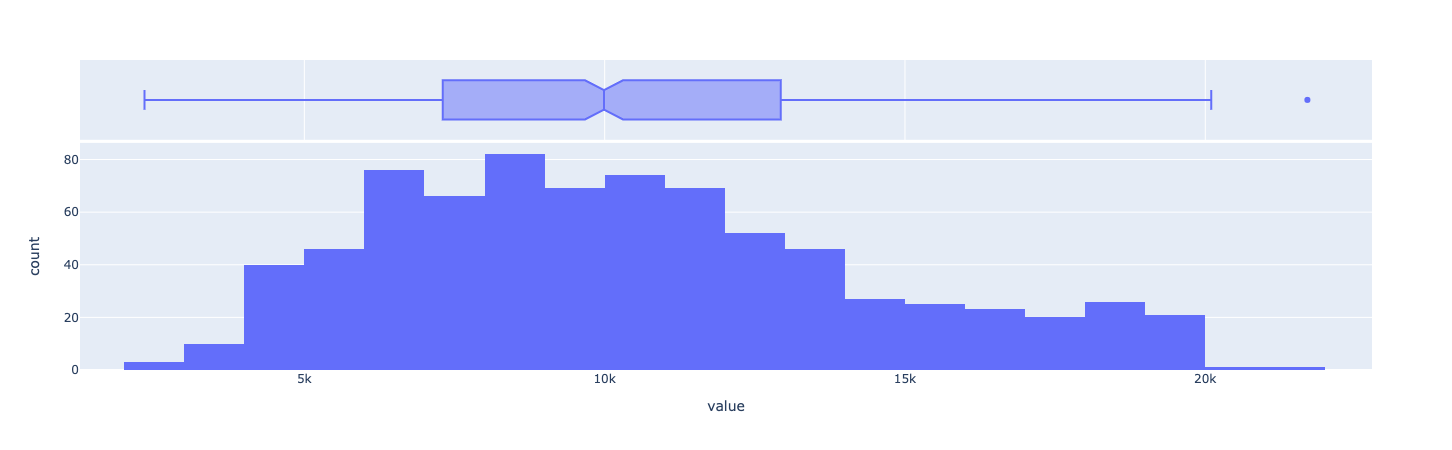

In [86]:
create_histograms('Outstate', bins=20)

In [27]:
fig  = make_subplots(rows=2, cols=2)

trace0 = go.Histogram(x=college_data['Expend'], name="Expenditure")
trace1 = go.Histogram(x=college_data['Room.Board'], name="Room board price")
trace2 = go.Histogram(x=college_data['PhD'], name='Number of PhD students')
trace3 = go.Histogram(x=college_data['Grad.Rate'], name='Graduation Rate')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)

fig.show()